In [11]:
# import libraries
#import gurobipy as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import numpy as np

In [7]:
# import data
links = pd.read_csv("links.csv")
nodes = pd.read_csv("nodes.csv")
loads = pd.read_csv("loads.csv")

In [8]:
# method to get distances
def dist(lat1in, lat2in, lon1in, lon2in):
    # approximate radius of earth in miles
    R = 3958.8

    lat1 = radians(lat1in)
    lon1 = radians(lon1in)
    lat2 = radians(lat2in)
    lon2 = radians(lon2in)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [9]:
# rearrange nodes by location
Locs = {
    n : np.array([nodes[lambda x: x['Node']==n]['Latitude'], nodes[lambda x: x['Node']==n]['Longitude']])
    for n in nodes['Node']
}

In [131]:
# package to compute shortest paths
from dijkstar import Graph, find_path

# distance graph
graph = Graph()

# compute distances (length of every link)
for index, row in links.iterrows():
    Node1 = int(row['Node1'])
    Node2 = int(row['Node2'])
    distance = dist(Locs[Node1][0], Locs[Node2][0], Locs[Node1][1], Locs[Node2][1])
    graph.add_edge(Node1, Node2, distance)

In [132]:
#compute harmonic centralities of a Graph
def compute_centralities(g: Graph):
    # initialize
    centralities = {n : 0 for n in nodes['Node']}
    
    for i in nodes['Node']:
        
        for j in nodes['Node']:
            
            try:
                # compute shortest path from i to j
                # Note: distance may be zero, in which case centrality = infinity
                cost = find_path(g, i, j).total_cost
                centralities[i] += 1/cost
            except:
                # no path of finite length could be found, 
                # and hence 0 (= 1/infinity) contribution to the centrality is made
                continue
    return centralities

In [133]:
centralities = compute_centralities(graph)

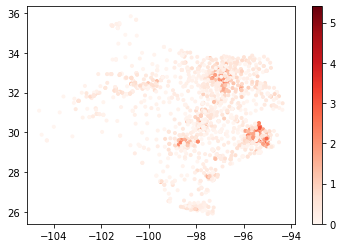

In [134]:
# vectorize the dictionary of centralities
vec_centrality = np.array([centralities[n] for n in nodes['Node']])

# plot heatmap according to centrality
plt.scatter(nodes["Longitude"], nodes["Latitude"], c = vec_centrality, marker = ".", cmap='Reds')
plt.colorbar()
plt.show()

In [137]:
# order the nodes by ascending centrality score
nodes_by_centrality = {node: centrality for node,centrality in sorted(centralities.items(), key=lambda x: x[1])[::-1]}

In [138]:
nodes_by_centrality

{7092: 5.403107653596884,
 7100: 4.558398959487432,
 7242: 4.2632921822712495,
 7070: 4.226350056944419,
 7087: 4.09932742416089,
 7075: 4.094046392238169,
 7015: 3.8405568690798013,
 7014: 3.8405568690798013,
 7004: 3.644144113292318,
 6160: 3.566274343613949,
 5082: 3.503371420070333,
 7188: 3.4866434461080806,
 7249: 3.420184119285038,
 7027: 3.4079976692096823,
 7089: 3.3796647656490415,
 7094: 3.3544677414767046,
 7250: 3.3152289830661705,
 5248: 3.2640807191589163,
 5194: 3.2569531542387296,
 7154: 3.238908051385883,
 6040: 3.2214993408172075,
 7300: 3.0559564903212206,
 6094: 3.042971377297349,
 7368: 3.0370817574877695,
 7017: 3.013588490659773,
 6099: 3.0115370737164224,
 5117: 3.0069939424044647,
 5173: 2.9830015269428305,
 5143: 2.954631866857066,
 6220: 2.944116043901069,
 7226: 2.909920006658748,
 5376: 2.8954558579240355,
 7276: 2.878626695541251,
 7051: 2.863081578126886,
 5086: 2.821325646351872,
 5157: 2.7676214642548946,
 5210: 2.7645048482423773,
 7419: 2.75747680724

In [124]:
central_nodes = [522229.29, 522128.35, 522026.88, 521925.81, 521824.90, 521724.78, 521624.22, 521523.72, 521421.70]
uncentral_nodes = [522229.29, 522151.57, 522066.71, 521988.59, 521910.78, 521825.49, 521724.87, 521639.46, 521537.41]
peakloads_nodes = [522229.29, 522127.65, 522026.48, 521916.91, 521816.62, 521715.66, 521614.12, 521513.52]

Text(0.5, 1.0, 'Cost vs. # batteries, over different strategies')

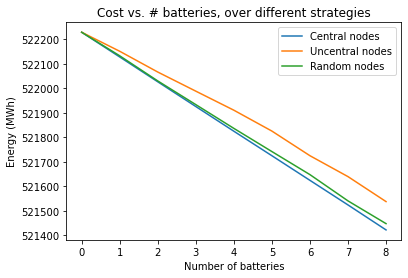

In [113]:
#plt.scatter(np.arange(8), means)
plt.plot(np.arange(9), np.array(central_nodes), label='Central nodes')
plt.plot(np.arange(9), np.array(uncentral_nodes), label='Uncentral nodes')
plt.plot(np.arange(9), np.array(means), label='Random nodes')
#plt.yscale('log')
#plt.axhline(c = 'green', label='Random nodes')
plt.legend()
plt.ylabel('Energy (MWh)')
plt.xlabel('Number of batteries')
plt.title('Cost vs. # batteries, over different strategies')

In [115]:
print("Energy saved per centrally placed battery:", (central_nodes[-1]-central_nodes[0])/len(means))
print("Energy saved per randomly placed battery:", (means[-1]-means[0])/len(means))
print("Energy saved per uncentrally placed battery:", (uncentral_nodes[-1]-uncentral_nodes[0])/len(means))

Energy saved per centrally placed battery: -89.7322222222186
Energy saved per randomly placed battery: -86.8792222222158
Energy saved per uncentrally placed battery: -76.87555555555608


Text(0.5, 1.0, 'Cost vs. # batteries, over different strategies')

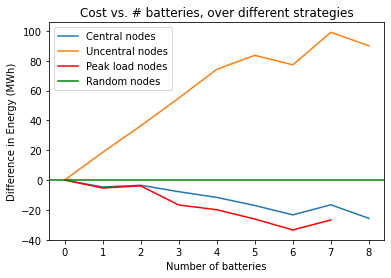

In [128]:
#plt.scatter(np.arange(8), means)
plt.plot(np.arange(9), np.array(central_nodes)-np.array(means), label='Central nodes')
plt.plot(np.arange(9), np.array(uncentral_nodes)-np.array(means), label='Uncentral nodes')
plt.plot(np.arange(8), np.array(peakloads_nodes)-np.array(means)[:8], label='Peak load nodes', c='red')
#plt.plot(np.arange(9), np.array(means), label='Random nodes')
plt.axhline(c = 'green', label='Random nodes')

plt.legend()
plt.ylabel('Difference in Energy (MWh)')
plt.xlabel('Number of batteries')
plt.title('Cost vs. # batteries, over different strategies')